# **1. Data Collection and Preprocessing**

## **Data Collection**

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd

# Import the datasets
sample_submission = pd.read_csv('/content/drive/MyDrive/Datasets/uvexzon-house-price/sample_submission.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/uvexzon-house-price/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/uvexzon-house-price/train.csv')

## **Data Cleaning**

In [41]:
# Define the columns to impute
columns_to_impute = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

# Impute missing values with 'NA' for specified columns
train_df[columns_to_impute] = train_df[columns_to_impute].fillna('NA')
test_df[columns_to_impute] = test_df[columns_to_impute].fillna('NA')

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [44]:
threshold = 0.8 * len(train_df.columns)
train_df.dropna(thresh=threshold, inplace=True)

In [45]:
null_threshold = 0.1 * len(train_df)
columns_to_drop = [k for k,v in train_df.isnull().sum().to_dict().items() if v >= null_threshold]
columns_to_drop

['LotFrontage', 'MasVnrType']

In [46]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [47]:
numerical_columns_to_impute = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'
]

for col in numerical_columns_to_impute:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(train_df[col].median())

In [48]:
categorical_columns_to_impute = [
    'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'
]

for col in categorical_columns_to_impute:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [51]:
import numpy as np

# Get numerical column names
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
# Get categorical column names
categorical_cols = test_df.select_dtypes(exclude=np.number).columns.tolist()

In [52]:
len(categorical_cols)

42

In [53]:
len(test_df.columns)

78

In [54]:
len(numerical_cols)

36

In [55]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [56]:
for col in categorical_cols:
    unique_values = train_df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column 'Street': ['Pave' 'Grvl']
Unique values in column 'Alley': ['NA' 'Grvl' 'Pave']
Unique values in column 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column 'Utilities': ['AllPub' 'NoSeWa']
Unique values in column 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column 'LandSlope': ['Gtl' 'Mod' 'Sev']
Unique values in column 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in column 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in 

In [57]:
import pandas as pd

# Assuming 'df' is your original DataFrame
selected_features = ['Id', 'MSZoning', 'LotArea', 'BldgType', 'HouseStyle', 'BedroomAbvGr', 'GarageArea', 'SalePrice']

# Filter the DataFrame to keep only the selected features
train_df = train_df[selected_features]
selected_features.remove('SalePrice')
test_df = test_df[selected_features]

## **Data Transformation**

In [58]:
ordinal_category_mapping = {
    'Street': {'Pave':1, 'Grvl':0},
    'Alley': {'Pave':2, 'Grvl':1, 'NA':0},
    'LotShape': {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0},
    'LandContour': {'Lvl':3, 'Bnk':2, 'HLS':1, 'Low':0},
    'Utilities': {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
    'LandSlope': {'Gtl':2, 'Mod':1, 'Sev':0},
    'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'BsmtQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'BsmtCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'BsmtExposure': {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
    'BsmtFinType1': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
    'BsmtFinType2': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'CentralAir': {'Y':1, 'N':0},
    'Electrical': {'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0},
    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'Functional': {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1},
    'FireplaceQu': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'GarageFinish': {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    'GarageQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'GarageCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'PavedDrive': {'Y':2, 'P':1, 'N':0},
    'PoolQC': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0},
    'Fence': {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
}

In [59]:
for k,v in ordinal_category_mapping.items():
    # Check if k is a present column in dataframes
    if k not in train_df.columns or k not in test_df.columns:
        continue

    # Replace categorical values with numerical values using the mapping dictionary
    train_df[k] = train_df[k].map(v)
    test_df[k] = test_df[k].map(v)

In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1459 non-null   int64  
 1   MSZoning      1459 non-null   object 
 2   LotArea       1459 non-null   int64  
 3   BldgType      1459 non-null   object 
 4   HouseStyle    1459 non-null   object 
 5   BedroomAbvGr  1459 non-null   int64  
 6   GarageArea    1459 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 79.9+ KB


In [61]:
import numpy as np

# Get numerical column names
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
# Get categorical column names
categorical_cols = test_df.select_dtypes(exclude=np.number).columns.tolist()

In [62]:
len(categorical_cols)

3

In [63]:
len(test_df.columns)

7

In [64]:
len(numerical_cols)

4

In [65]:
train_df = pd.get_dummies(train_df, columns=categorical_cols).astype(int)
test_df = pd.get_dummies(test_df, columns=categorical_cols).astype(int)

In [66]:
import numpy as np

# Get numerical column names
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
# Get categorical column names
categorical_cols = test_df.select_dtypes(exclude=np.number).columns.tolist()

In [67]:
len(categorical_cols)

0

In [68]:
len(test_df.columns)

21

In [69]:
len(numerical_cols)

21

In [70]:
a = list(train_df.columns)
b = list(test_df.columns)

for i in b:
    if i in a:
       a.remove(i)

a.remove('SalePrice')

In [71]:
missing_cols = a

for col in missing_cols:
    test_df[col] = 0

In [72]:
len(train_df.columns), len(test_df.columns)

(23, 22)

## **Feature Engineering**

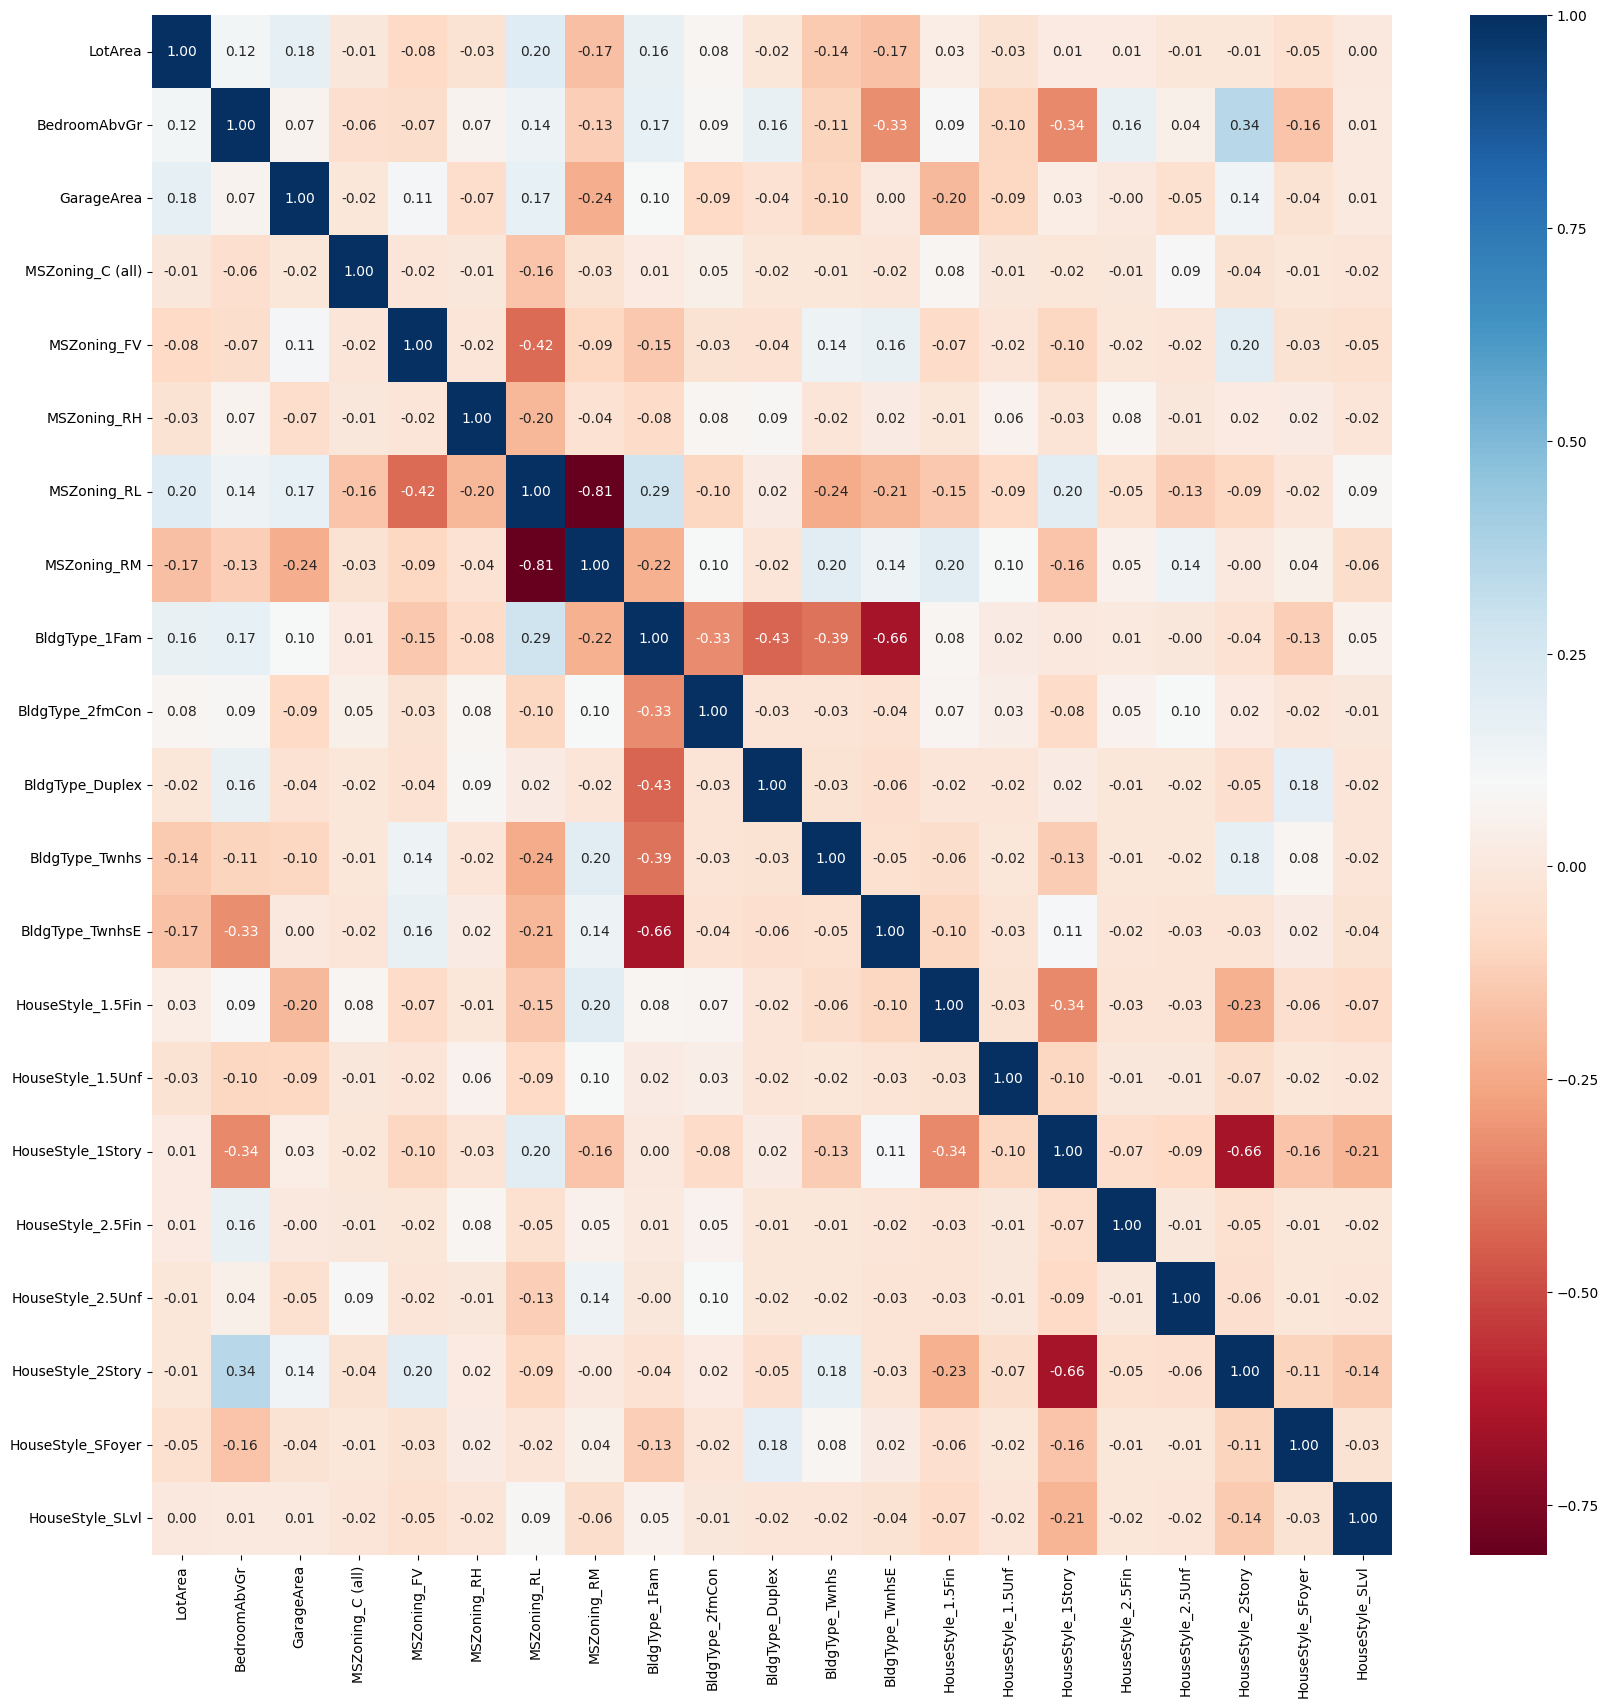

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
def calculate_correlation_matrix(df, columns):
  return df[columns].corr()

# Plot correlation matrix
def plot_correlation_matrix(corr_matrix):
  plt.figure(figsize=(20, 20))
  sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f")
  plt.show()

corr_matrix = calculate_correlation_matrix(train_df, train_df.drop(columns=['Id', 'SalePrice']).columns)
plot_correlation_matrix(corr_matrix)

In [74]:
abs_corr_matrix = corr_matrix.abs()
upper_tri = corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))

corr_threshold = 0.5

corr_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]
corr_train_df = train_df.drop(corr_to_drop, axis=1)
corr_test_df = test_df.drop(corr_to_drop, axis=1)

In [75]:
corr_to_drop

[]

In [76]:
len(corr_train_df.columns), len(corr_test_df.columns)

(23, 22)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_to_include = corr_train_df.columns.drop(['Id', 'SalePrice'])

combined_df = pd.concat([corr_train_df[features_to_include], corr_test_df[features_to_include]])

scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_df)

train_scaled = combined_scaled[:len(corr_train_df)]
test_scaled = combined_scaled[len(corr_train_df):]

pca = PCA()
pca.fit(train_scaled)

train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(train_pca.shape[1])])
test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(test_pca.shape[1])])

train_pca_df = pd.concat([corr_train_df[['Id', 'SalePrice']], train_pca_df], axis=1)
test_pca_df = pd.concat([corr_test_df[['Id']], test_pca_df], axis=1)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

non_principle_components = []

for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: Explained Variance Ratio = {ratio:.3f}")

    if ratio < 0.015:
        non_principle_components.append(f"PC{i+1}")

PC1: Explained Variance Ratio = 0.039
PC2: Explained Variance Ratio = 0.025
PC3: Explained Variance Ratio = 0.022
PC4: Explained Variance Ratio = 0.020
PC5: Explained Variance Ratio = 0.019
PC6: Explained Variance Ratio = 0.017
PC7: Explained Variance Ratio = 0.016
PC8: Explained Variance Ratio = 0.015
PC9: Explained Variance Ratio = 0.015
PC10: Explained Variance Ratio = 0.014
PC11: Explained Variance Ratio = 0.014
PC12: Explained Variance Ratio = 0.014
PC13: Explained Variance Ratio = 0.014
PC14: Explained Variance Ratio = 0.013
PC15: Explained Variance Ratio = 0.013
PC16: Explained Variance Ratio = 0.013
PC17: Explained Variance Ratio = 0.013
PC18: Explained Variance Ratio = 0.012
PC19: Explained Variance Ratio = 0.012
PC20: Explained Variance Ratio = 0.012
PC21: Explained Variance Ratio = 0.012
PC22: Explained Variance Ratio = 0.012
PC23: Explained Variance Ratio = 0.011
PC24: Explained Variance Ratio = 0.011
PC25: Explained Variance Ratio = 0.011
PC26: Explained Variance Ratio = 0

In [ ]:
train_pc_df = train_pca_df.drop(columns=non_principle_components)
test_pc_df = test_pca_df.drop(columns=non_principle_components)

In [ ]:
test_pc_df

,Id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1461,-1.071920,2.353884,-1.508665,-0.213645,-0.838493,0.738967,0.954520,-0.111752,0.938527
1,1462,1.580725,4.527269,0.380245,-0.164926,-3.609592,4.482997,-4.341927,1.029870,-5.106150
2,1463,1.322860,-0.264295,-0.062508,0.119341,-0.901247,-0.928591,-1.452667,-0.941587,0.520487
3,1464,1.660101,-0.892430,0.152468,0.069633,-0.848668,-0.931085,-1.247245,-1.080364,0.401951
4,1465,1.625111,-1.352584,-1.014201,0.933080,0.909083,0.889300,0.012361,-0.658962,-0.220081
...,...,...,...,...,...,...,...,...,...,...
1454,2915,-3.620903,-2.790712,-3.363619,4.767495,0.025692,-0.614894,0.896904,0.421019,0.310746
1455,2916,-3.126838,-1.361859,-2.930625,4.739645,0.136463,1.109552,0.829375,0.782197,-0.457878
1456,2917,0.326616,1.654886,-1.212600,-0.062037,0.144765,-0.636868,0.195915,0.111032,-0.410890
1457,2918,-0.262395,2.067143,-2.151577,2.067703,-1.497648,0.857581,-3.198526,-0.079705,-2.805562


# **2. Model Development and Training**

## **Data Splitting**

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    corr_train_df.drop(['Id', 'SalePrice'], axis=1),  # Features
    corr_train_df['SalePrice'],  # Target variable
    test_size=0.2,  # 20% for validation set
    random_state=42
)

## **Algorithm Selection**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"{name}:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print()

Linear Regression:
Mean Absolute Error: 39258.90
Mean Squared Error: 3910805232.57
R-squared: 0.49

Decision Tree:
Mean Absolute Error: 44356.40
Mean Squared Error: 5312933734.23
R-squared: 0.31

Random Forest:
Mean Absolute Error: 34401.23
Mean Squared Error: 3283016308.59
R-squared: 0.57

Support Vector Regression:
Mean Absolute Error: 59557.49
Mean Squared Error: 7859482243.24
R-squared: -0.02

Gradient Boosting Regression:
Mean Absolute Error: 34310.27
Mean Squared Error: 2939697888.72
R-squared: 0.62

XGBoost:
Mean Absolute Error: 36688.96
Mean Squared Error: 3717918134.06
R-squared: 0.52



In [79]:
best_model = max(models, key=lambda x: models[x].score(X_val, y_val))
print(f"Best Model: {best_model}")

Best Model: Gradient Boosting Regression


## **Model Training**

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

## **Model Validation**

In [90]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2938384913.03
R-squared: 0.62


## **Hyperparameter Tuning**

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

In [92]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

# **3. Model Evaluation**

In [93]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_new = best_model.predict(X_val)

In [94]:
mse_new = mean_squared_error(y_val, y_pred_new)
r2_new = r2_score(y_val, y_pred_new)

print(f"Best Model: Gradient Boosting Regressor")
print(f"Mean Squared Error: {mse_new:.2f}")
print(f"R-squared: {r2_new:.2f}")

Best Model: Gradient Boosting Regressor
Mean Squared Error: 2925955980.65
R-squared: 0.62


In [98]:
X_train.head()

,LotArea,BedroomAbvGr,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
254,8400,3,294,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1066,7837,3,380,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
638,8777,2,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
799,7200,3,240,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
380,5000,3,308,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LotArea            1168 non-null   int64
 1   BedroomAbvGr       1168 non-null   int64
 2   GarageArea         1168 non-null   int64
 3   MSZoning_C (all)   1168 non-null   int64
 4   MSZoning_FV        1168 non-null   int64
 5   MSZoning_RH        1168 non-null   int64
 6   MSZoning_RL        1168 non-null   int64
 7   MSZoning_RM        1168 non-null   int64
 8   BldgType_1Fam      1168 non-null   int64
 9   BldgType_2fmCon    1168 non-null   int64
 10  BldgType_Duplex    1168 non-null   int64
 11  BldgType_Twnhs     1168 non-null   int64
 12  BldgType_TwnhsE    1168 non-null   int64
 13  HouseStyle_1.5Fin  1168 non-null   int64
 14  HouseStyle_1.5Unf  1168 non-null   int64
 15  HouseStyle_1Story  1168 non-null   int64
 16  HouseStyle_2.5Fin  1168 non-null   int64
 17  HouseStyle_2.5Unf

In [106]:
corr_test_df.columns

Index(['Id', 'LotArea', 'BedroomAbvGr', 'GarageArea', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Fin'],
      dtype='object')

# **4. Model Serialization**

## **Saving the Model**

In [107]:
import joblib

joblib.dump(best_model, 'model.joblib')

['model.joblib']

In [108]:
import sklearn
print(sklearn.__version__)

1.5.2
